### **Testing the impact of negations on CCS results**.

#### **Setup**

1. Hate vs antagonist datset : $x^i_{safe} = negated(x^i_{harm})$ for harm-safe pairs in $X_{hate-vs-ant}$ data. 
- Total samples: 514;
- negation words `not`,`don't`, `shouldn't`;
- string to replace negation words `ttt`;

1. Я проанализировала значение всех метрик точности по всем слоям и выбрала примерно 80 квантиль (accurayc > 0.6), как точку значимого точности
2. Для моделей, достигающих значимое значение точности я провела проверку разделения на переобучение/случайность. Проверка на случайность основана на предположении:
"Если разделение – не результат переобучения или случайности, то оно должно пропадать, когда в паре предложений $x^i_{safe}, x^i_{harm}$ разделение исчезнает. На примере, это может проверено так. 

Пусть есть пара предложений:
1. safe — Mentally retarded people are not stupid or have weak intellect, 
2. harm — Mentally retarded people are not stupid or have weak intellect

Если в тако постановке заменить токен not на случайный ttt, то разделение должно исчезнуть. 

Чтобы это проверить был собран датасет, такой что $x^i_{harm} = negated(x^i_{safe})$ или $^i_{safe} = negated(x^i_{harm})$. В качестве слова отрицания всегда использовалось слово not. Модели, со значимым значением точности были прогнаны на 3х датасетах с одинаковой предобработкой данных (нормировка и вычитание медианы). Датасеты:

1. Изначальный, где пары harm-safe — это переформулированные предложения
2. Not датасет, где пары harm-safe — такие, что одно из содержит слово not.
3. Not random dataset, где пары harm-safe — убраны и везде словно not заменено на токен ttt.

Результаты показыают, что если в модели было значимое разделение (deberta large, llama3b), то замена токена убирает качество разделения. Если же разделение не было сильным (gpt2), то модель не проходит проверку на случайность разделения (и может наблюдаться незначительный рост точности  улучшение метрик соглассованости и contradiction). 

In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import sys

sys.path.append(os.path.abspath(os.path.dirname('/Users/sabrinasadieh/Code/ccs_aisf/code/ccs.py')))

In [45]:
from format_results import get_results_table

GENERAL_PATH = '/Users/sabrinasadieh/Code/ccs_aisf/notebooks/rnd_check/'

In [127]:
with open(GENERAL_PATH+'ccs_deberta-v3-large-hate_not_with_ttt_check.pkl', 'rb') as f:
  enc_large_pretr_ttt = pickle.load(f)

with open(GENERAL_PATH+'ccs_deberta-v3-large-hate_without_ttt_check.pkl', 'rb') as f:
    enc_large_pretr = pickle.load(f)

with open(GENERAL_PATH+'ccs_deberta-v3-large-hate_original_results.pkl', 'rb') as f:
   enc_large_pretr_orig = pickle.load(f)

enc_large_pretr_ttt_table = get_results_table(enc_large_pretr_ttt)
enc_large_pretr_table = get_results_table(enc_large_pretr)
enc_large_pretr_orig_table = get_results_table(enc_large_pretr_orig)

In [130]:
with open(GENERAL_PATH+'ccs_gpt2_not_with_ttt_check.pkl', 'rb') as f:
  dec_base_ttt = pickle.load(f)

with open(GENERAL_PATH+'ccs_gpt2_without_ttt_check.pkl', 'rb') as f:
    dec_base = pickle.load(f)


with open(GENERAL_PATH+'ccs_gpt2_original_results.pkl', 'rb') as f:
   dec_base_orig = pickle.load(f)


with open(GENERAL_PATH+'ccs_gpt2-large_not_with_ttt_check.pkl', 'rb') as f:
  dec_large_ttt = pickle.load(f)

with open(GENERAL_PATH+'ccs_gpt2-large_without_ttt_check.pkl', 'rb') as f:
  dec_large = pickle.load(f)

with open(GENERAL_PATH+'ccs_gpt2-large_original_results.pkl', 'rb') as f:
  dec_large_orig = pickle.load(f)


dec_base_ttt_table = get_results_table(dec_base_ttt)
dec_base_table = get_results_table(dec_base)
dec_base_orig_table = get_results_table(dec_base_orig)


dec_large_ttt_table = get_results_table(dec_large_ttt)
dec_large_table = get_results_table(dec_large)
dec_large_orig_table = get_results_table(dec_large_orig)


In [134]:
with open(GENERAL_PATH+'ccs_bert-base-uncased_not_with_ttt_check.pkl', 'rb') as f:
  enc_dec_base_ttt = pickle.load(f)

with open(GENERAL_PATH+'ccs_bert-base-uncased_without_ttt_check.pkl', 'rb') as f:
    enc_dec_base = pickle.load(f)

with open(GENERAL_PATH+'ccs_bert-base-uncased_original_results.pkl', 'rb') as f:
    enc_dec_base_orig = pickle.load(f)


with open(GENERAL_PATH+'ccs_bert-base-uncased_DEC_not_with_ttt_check.pkl', 'rb') as f:
  enc_dec_base_dec_ttt = pickle.load(f)

with open(GENERAL_PATH+'ccs_bert-base-uncased_DEC_without_ttt_check.pkl', 'rb') as f:
    enc_dec_base_dec = pickle.load(f)

with open(GENERAL_PATH+'ccs_bert-base-uncased_DEC_original_results.pkl', 'rb') as f:
    enc_dec_base_dec_orig = pickle.load(f)


enc_dec_base_ttt_table = get_results_table(enc_dec_base_ttt)
enc_dec_base_table = get_results_table(enc_dec_base)
enc_dec_base_orig_table = get_results_table(enc_dec_base_orig)

enc_dec_base_dec_ttt_table = get_results_table(enc_dec_base_dec_ttt)
enc_dec_base_dec_table = get_results_table(enc_dec_base_dec)
enc_dec_base_dec_orig_table = get_results_table(enc_dec_base_dec_orig)


with open(GENERAL_PATH+'ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_not_with_ttt_check.pkl', 'rb') as f:
  enc_dec_hate_ttt = pickle.load(f)

with open(GENERAL_PATH+'ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_without_ttt_check.pkl', 'rb') as f:
    enc_dec_hate = pickle.load(f)

with open(GENERAL_PATH+'ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_without_ttt_check.pkl', 'rb') as f:
    enc_dec_hate_original = pickle.load(f)

with open(GENERAL_PATH+'ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_dec_not_with_ttt_check.pkl', 'rb') as f:
  enc_dec_hate_dec_ttt = pickle.load(f)

with open(GENERAL_PATH+'ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_dec_without_ttt_check.pkl', 'rb') as f:
    enc_dec_hate_dec = pickle.load(f)

with open(GENERAL_PATH+'ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_without_ttt_check.pkl', 'rb') as f:
    enc_dec_hate_dec_original = pickle.load(f)


enc_dec_hate_ttt_table = get_results_table(enc_dec_hate_ttt)
enc_dec_hate_table = get_results_table(enc_dec_hate)
enc_dec_hate_original_table = get_results_table(enc_dec_hate_original)

enc_dec_hate_dec_ttt_table = get_results_table(enc_dec_hate_dec_ttt)
enc_dec_hate_dec_table = get_results_table(enc_dec_hate_dec)
enc_dec_hate_original_dec_table = get_results_table(enc_dec_hate_dec_original)


## **Llama**

In [138]:
with open(GENERAL_PATH+'ccs_open_llama_3b_not_with_ttt_check.pkl', 'rb') as f:
    llama3b_ttt = pickle.load(f)

with open(GENERAL_PATH+'ccs_open_llama_3b_without_ttt_check.pkl', 'rb') as f:
    llama3b = pickle.load(f)

with open(GENERAL_PATH+'ccs_open_llama_3b_original_results.pkl', 'rb') as f:
    llama3b_orig = pickle.load(f)

llama3b_ttt_table = get_results_table(llama3b_ttt)
llama3b_without_ttt_table = get_results_table(llama3b)
llama3b_original_table = get_results_table(llama3b_orig)

### **Difference plots encoder models**

In [113]:
metrics = enc_large_pretr_ttt_table.columns[:-2]

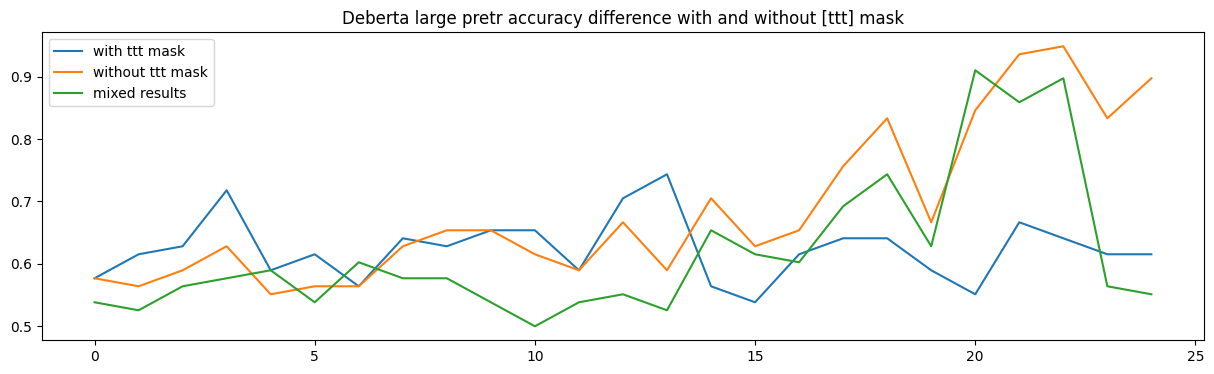

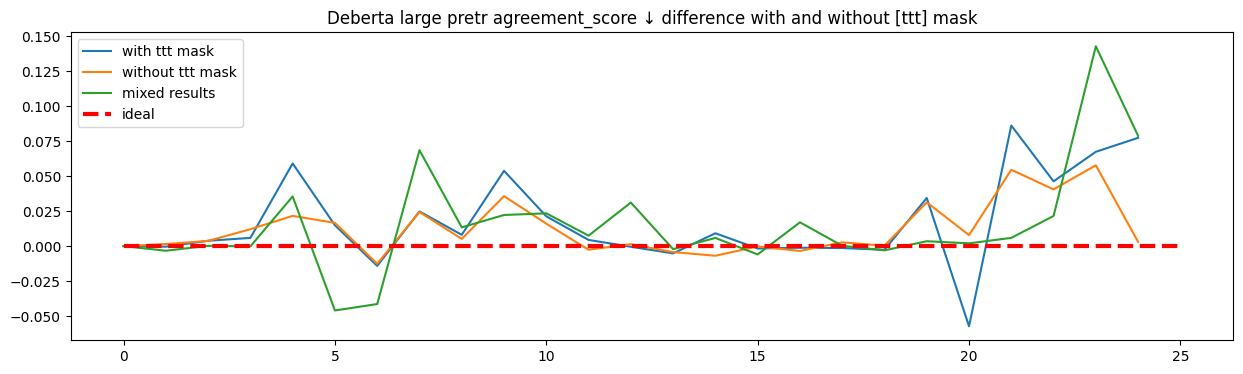

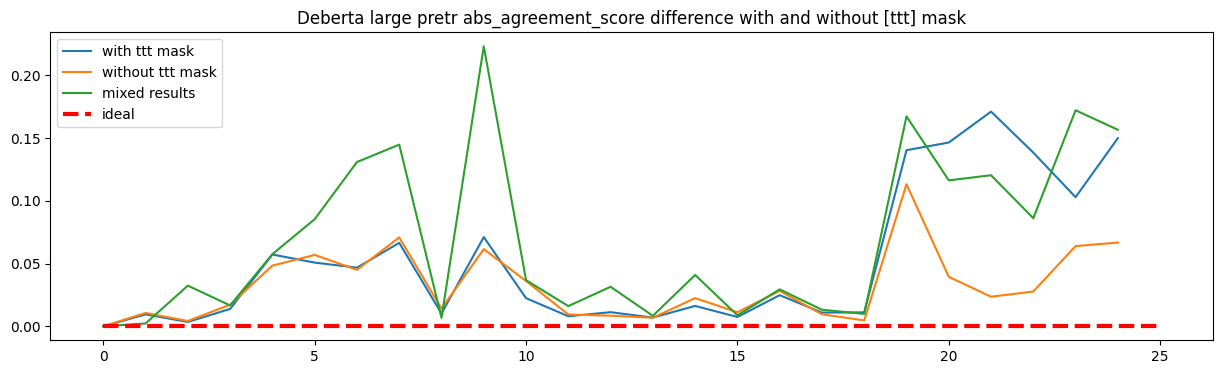

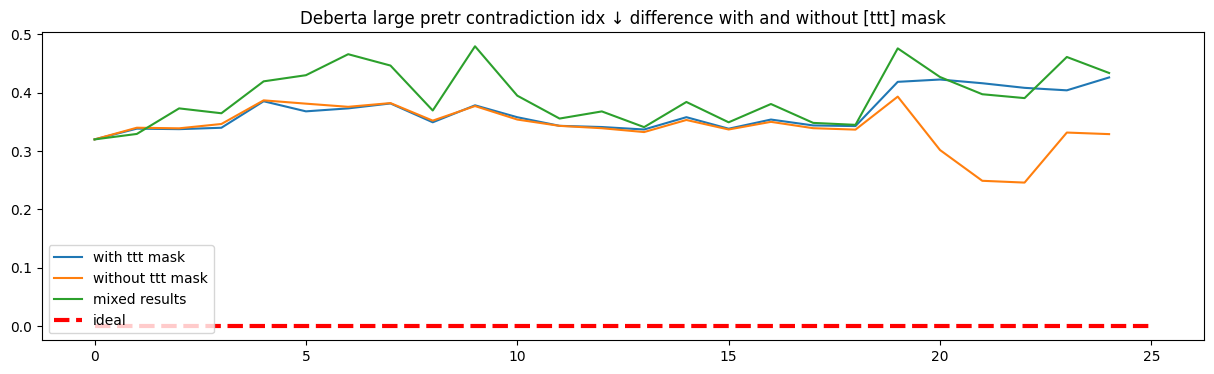

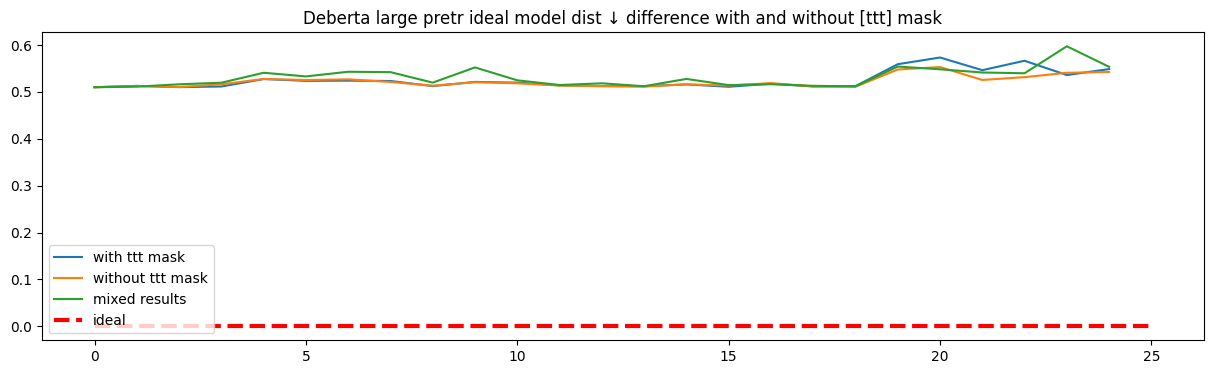

In [128]:
for idx, metric in enumerate(metrics):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(enc_large_pretr_ttt_table[metric], label='with ttt mask')
    plt.plot(enc_large_pretr_table[metric], label='without ttt mask')
    plt.plot(enc_large_pretr_orig_table[metric], label='mixed results')
    
    if idx != 0:
        plt.hlines(0, 0, 25, label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('Deberta large pretr '+metric+' difference with and without [ttt] mask')
    plt.show()

## **Decoder models**

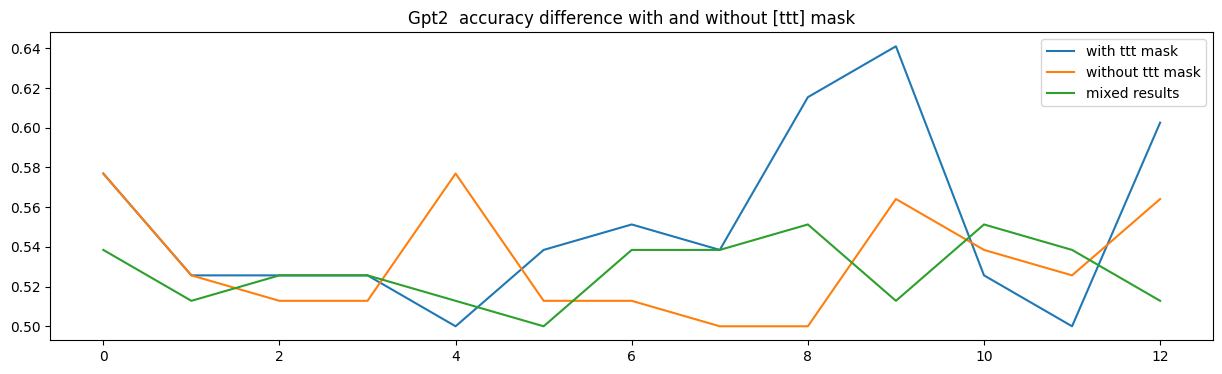

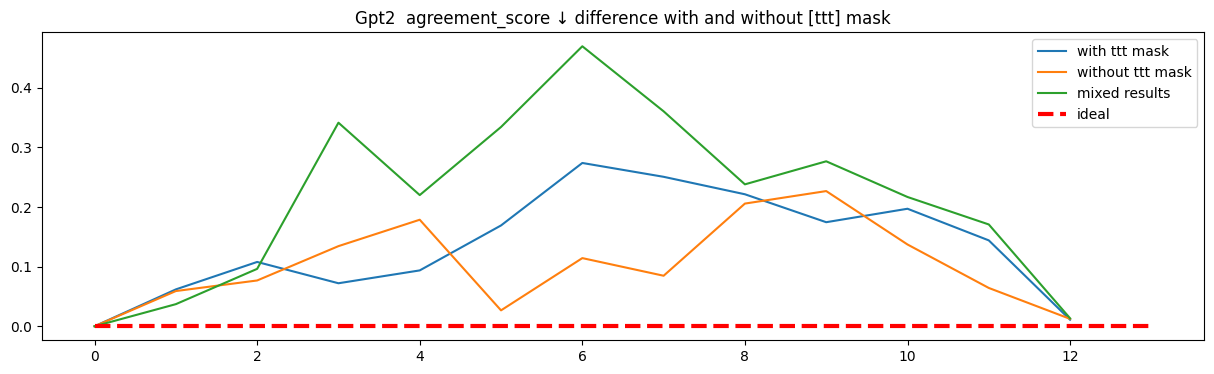

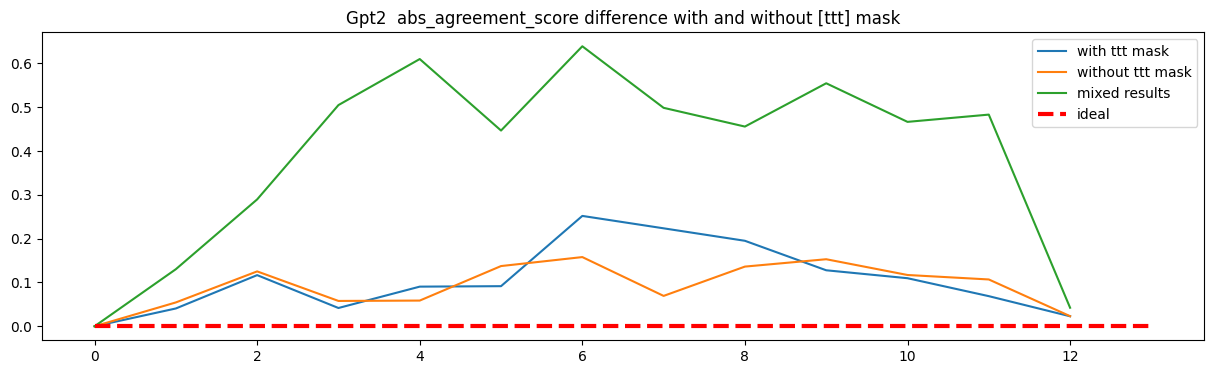

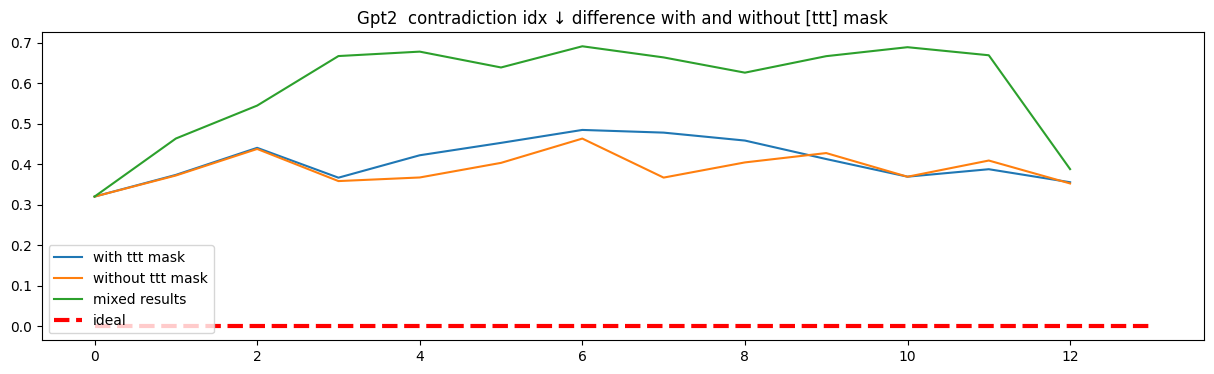

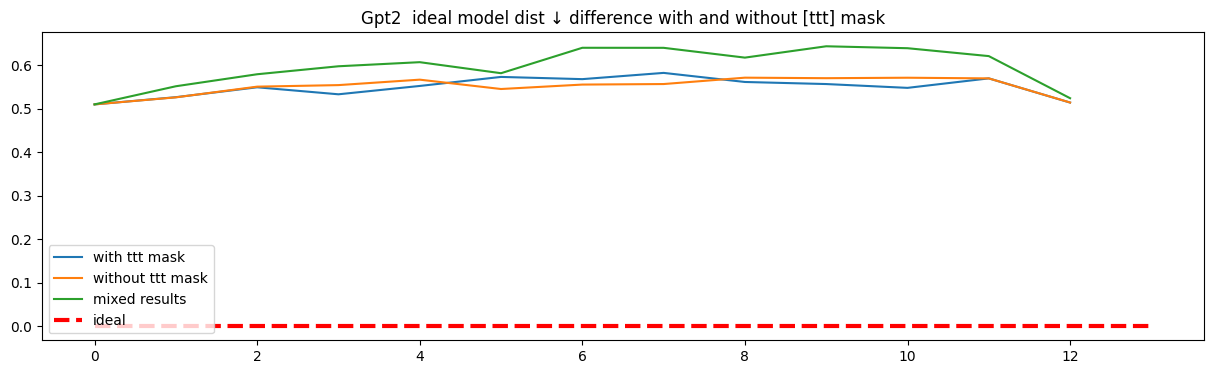

In [131]:
for idx, metric in enumerate(metrics):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(dec_base_ttt_table[metric], label='with ttt mask')
    plt.plot(dec_base_table[metric], label='without ttt mask')
    plt.plot(dec_base_orig_table[metric], label='mixed results')
    
    if idx != 0:
        plt.hlines(0, 0, 13, label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('Gpt2  '+metric+' difference with and without [ttt] mask')
    plt.show()

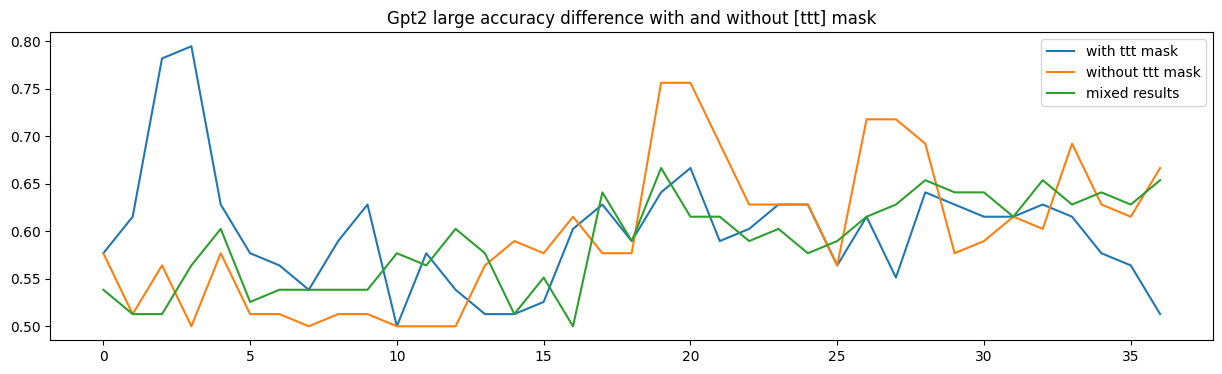

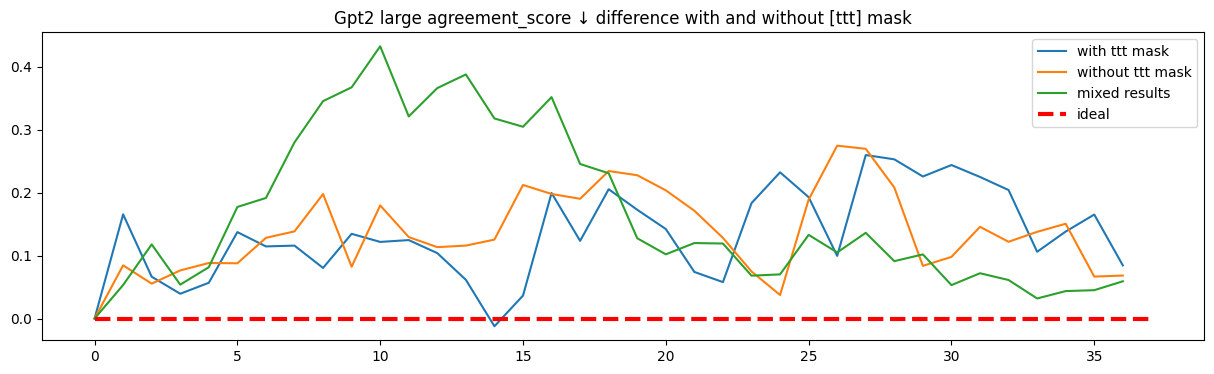

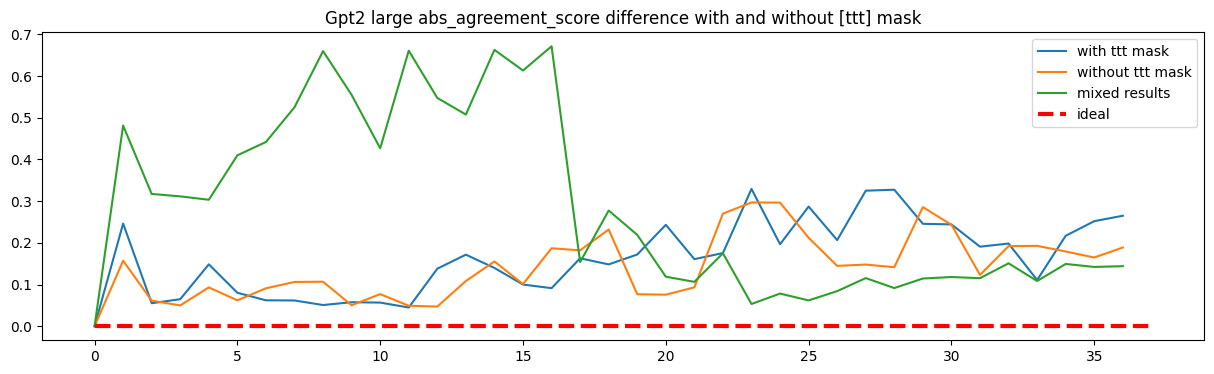

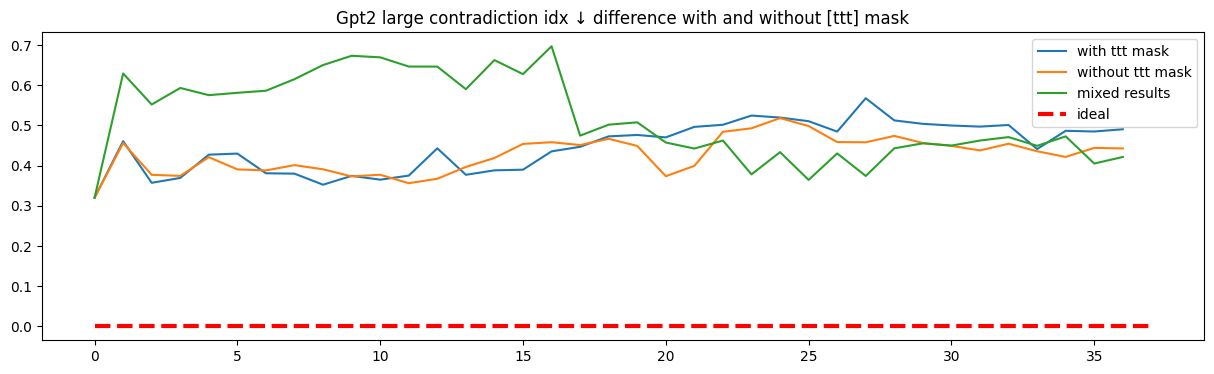

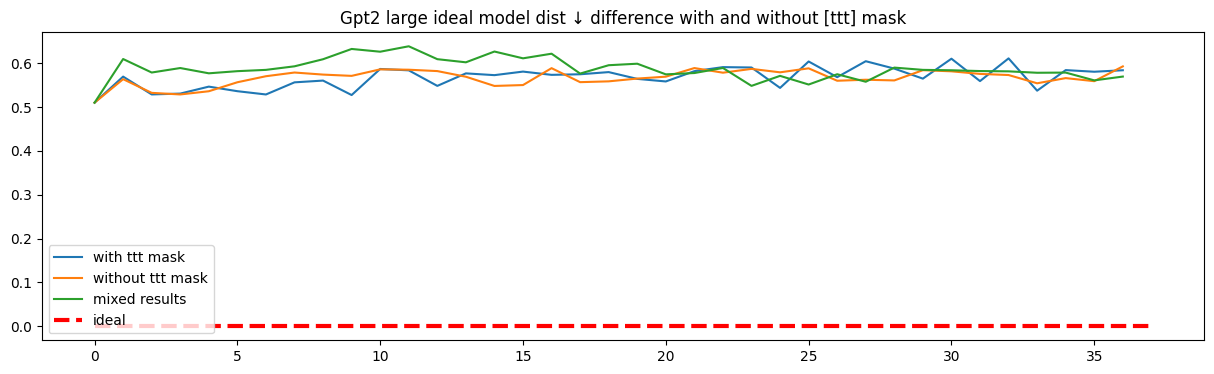

In [132]:
for idx, metric in enumerate(metrics):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(dec_large_ttt_table[metric], label='with ttt mask')
    plt.plot(dec_large_table[metric], label='without ttt mask')
    plt.plot(dec_large_orig_table[metric], label='mixed results')
    
    if idx != 0:
        plt.hlines(0, 0, 37, label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('Gpt2 large '+metric+' difference with and without [ttt] mask')
    plt.show()

## **Encoder Decoder**

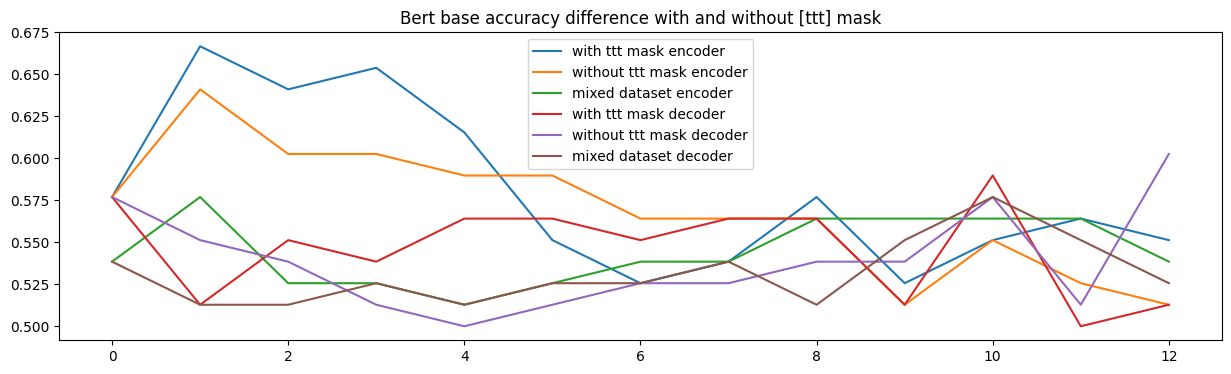

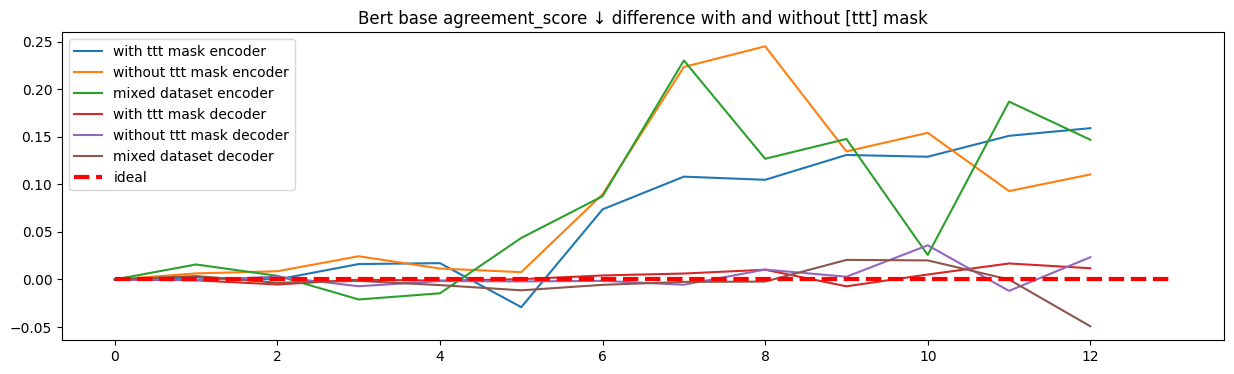

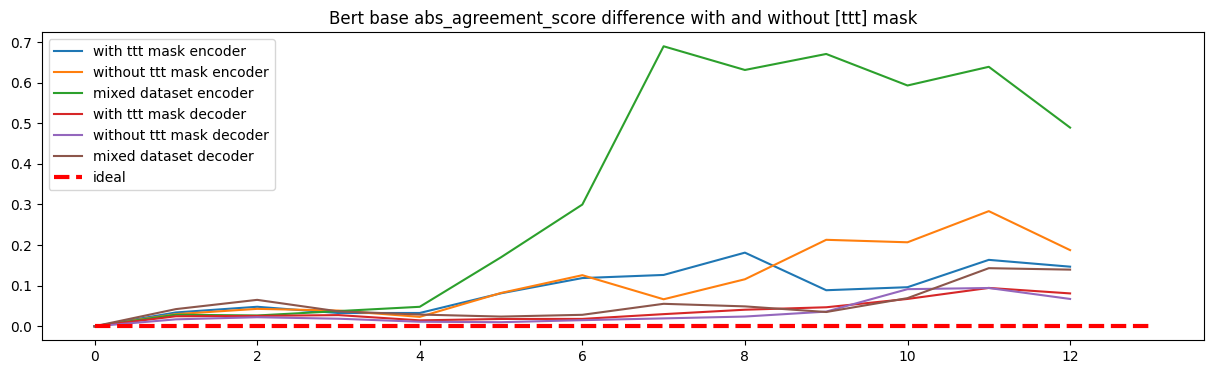

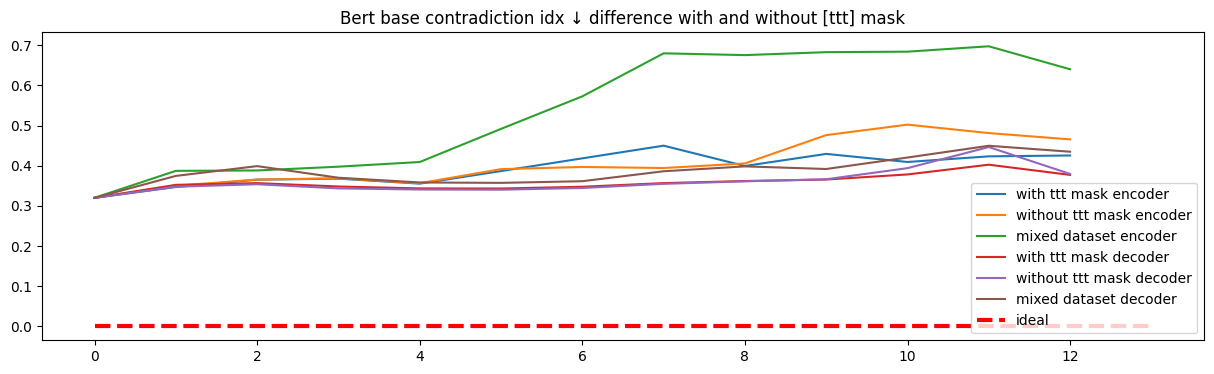

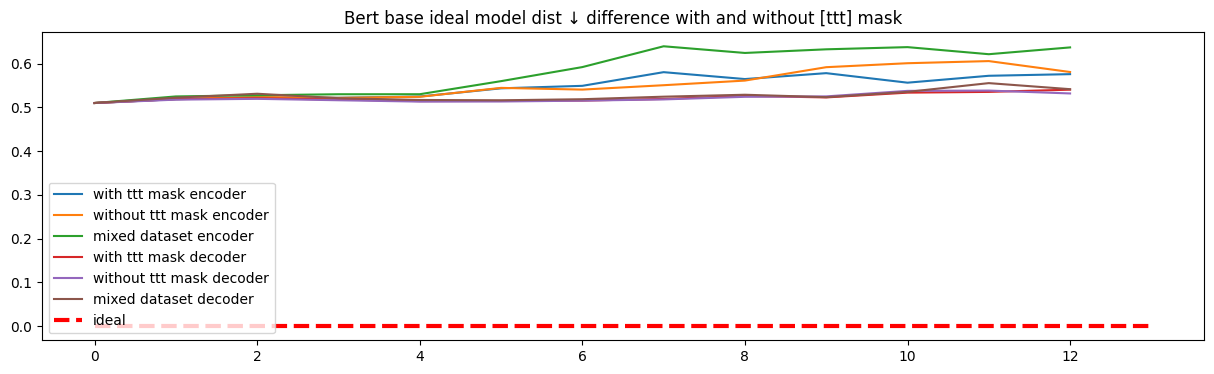

In [135]:
for idx, metric in enumerate(metrics):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(enc_dec_base_ttt_table[metric], label='with ttt mask encoder')
    plt.plot(enc_dec_base_table[metric], label='without ttt mask encoder')
    plt.plot(enc_dec_base_orig_table[metric], label='mixed dataset encoder')

    plt.plot(enc_dec_base_dec_ttt_table[metric], label='with ttt mask decoder')
    plt.plot(enc_dec_base_dec_table[metric], label='without ttt mask decoder')
    plt.plot(enc_dec_base_dec_orig_table[metric], label='mixed dataset decoder')


    if idx != 0:
        plt.hlines(0, 0, 13, label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('Bert base '+metric+' difference with and without [ttt] mask')
    plt.show()

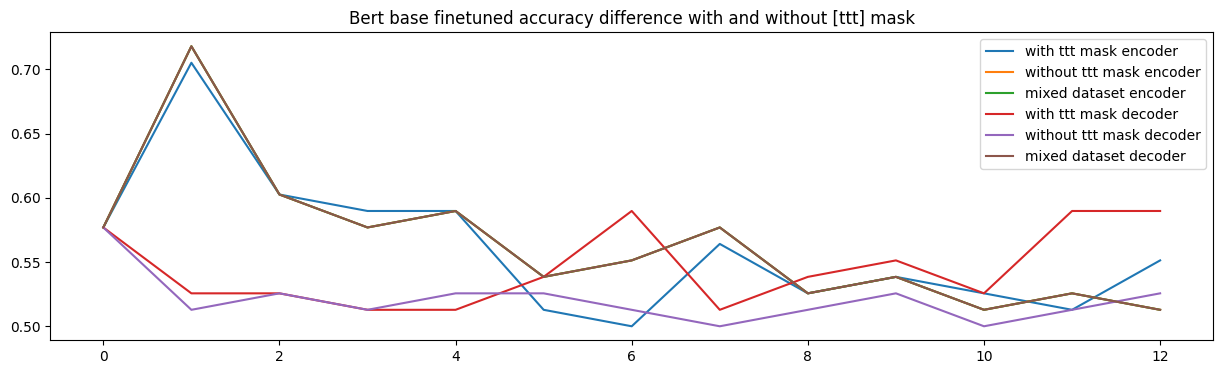

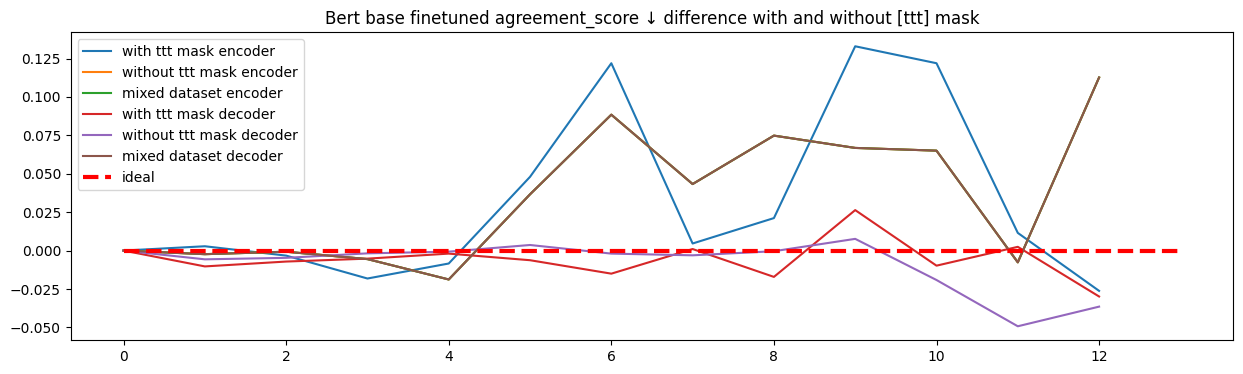

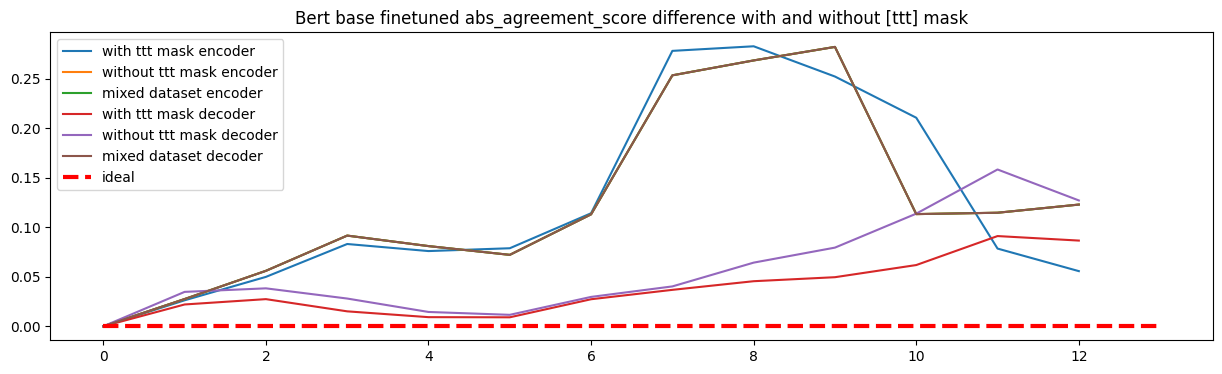

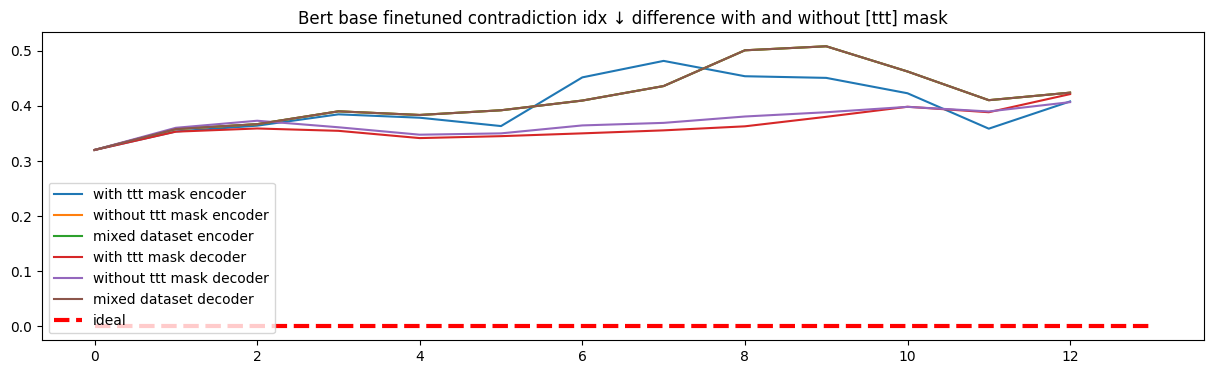

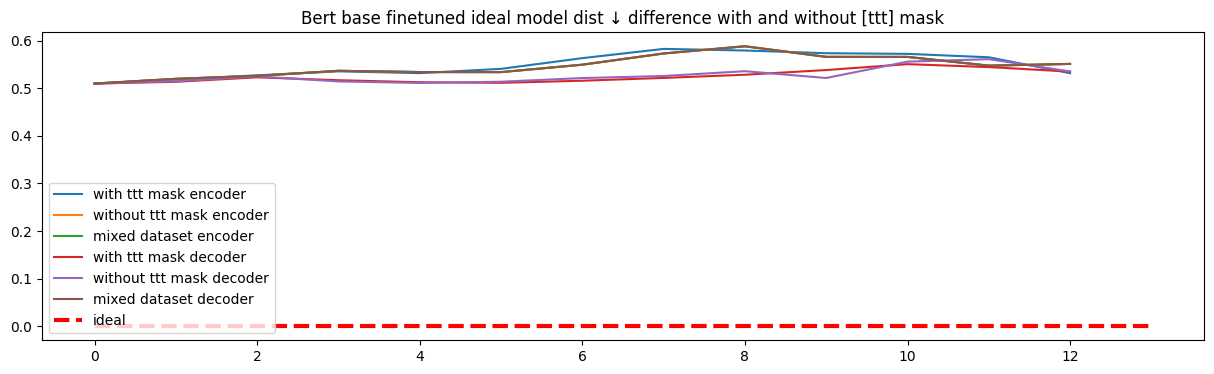

In [137]:
for idx, metric in enumerate(metrics):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(enc_dec_hate_ttt_table[metric], label='with ttt mask encoder')
    plt.plot(enc_dec_hate_table[metric], label='without ttt mask encoder')
    plt.plot(enc_dec_hate_original_table[metric], label='mixed dataset encoder')

    plt.plot(enc_dec_hate_dec_ttt_table[metric], label='with ttt mask decoder')
    plt.plot(enc_dec_hate_dec_table[metric], label='without ttt mask decoder')
    plt.plot(enc_dec_hate_original_dec_table[metric], label='mixed dataset decoder')



    if idx != 0:
        plt.hlines(0, 0, 13, label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('Bert base finetuned '+metric+' difference with and without [ttt] mask')
    plt.show()

## **Llama**

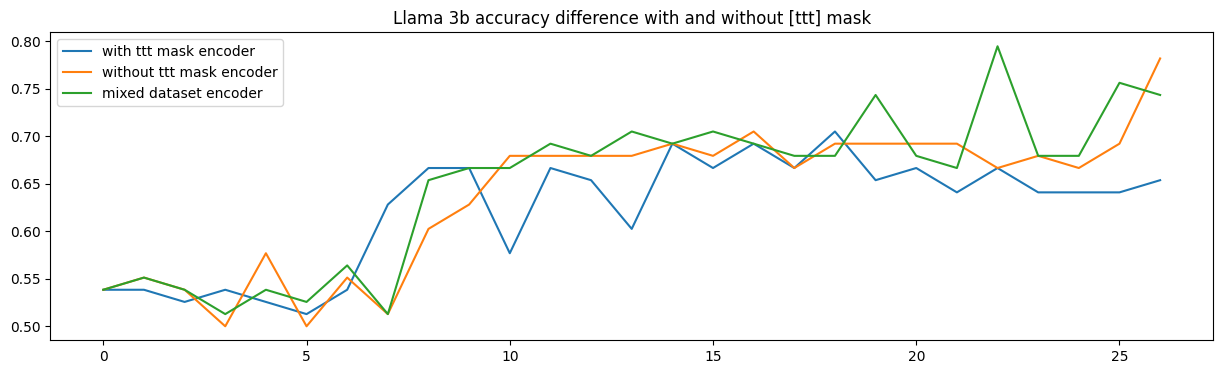

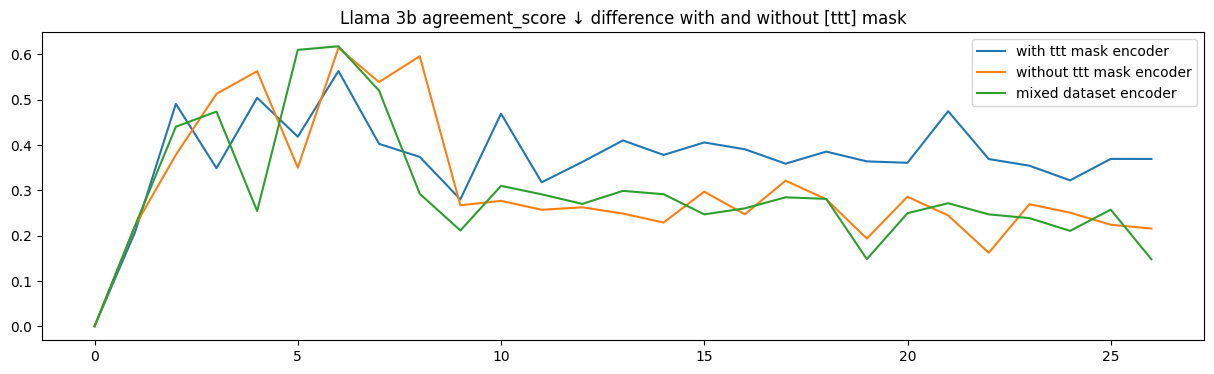

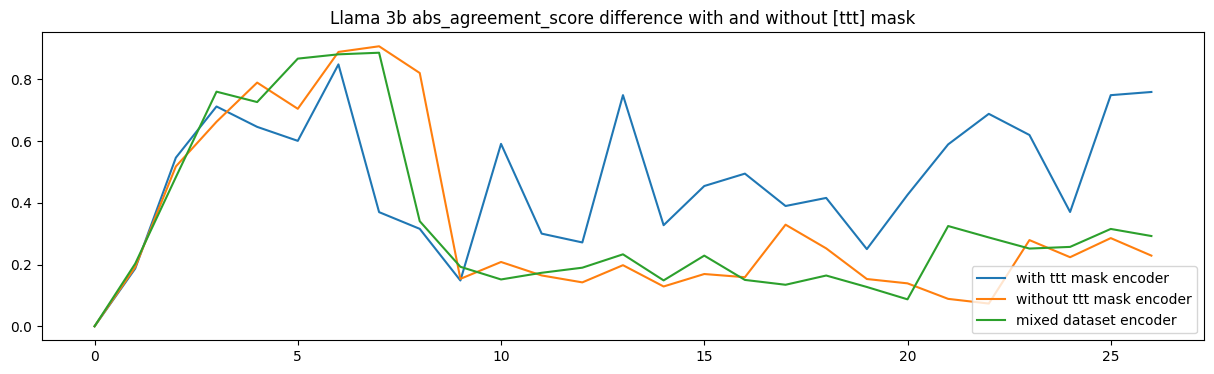

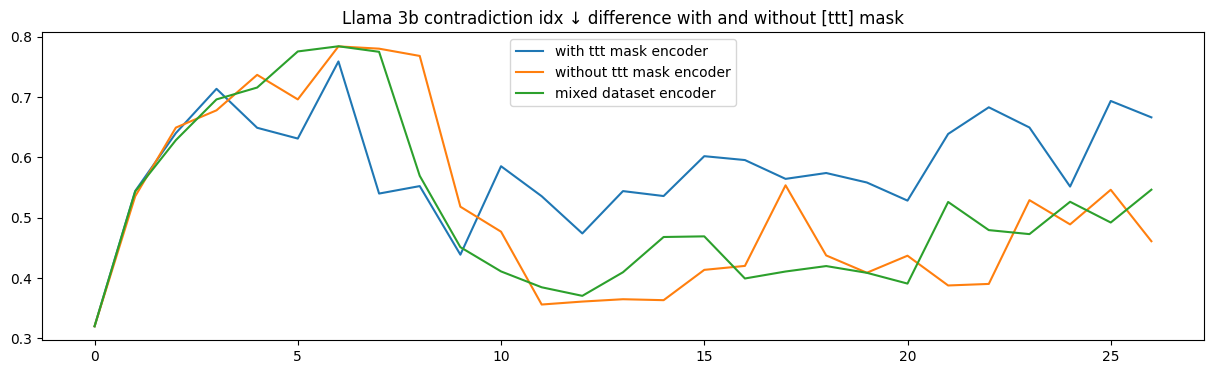

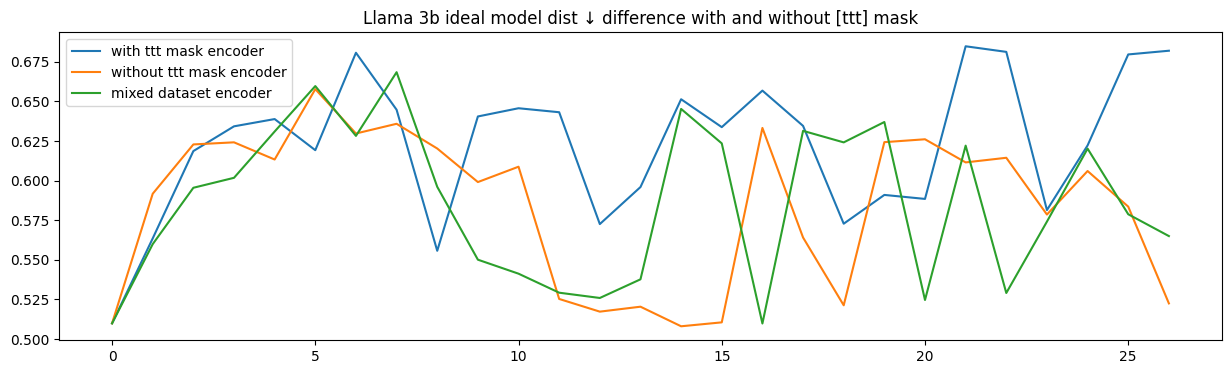

In [139]:
for idx, metric in enumerate(metrics):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(llama3b_ttt_table[metric], label='with ttt mask encoder')
    plt.plot(llama3b_without_ttt_table[metric], label='without ttt mask encoder')
    plt.plot(llama3b_original_table[metric], label='mixed dataset encoder')

    plt.legend()
    plt.title('Llama 3b '+metric+' difference with and without [ttt] mask')
    plt.show()

